In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df=pd.read_excel("Data_Train.xlsx")
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
train_df.shape

(10683, 11)

In [4]:
## checking missing values
train_df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
## drop missing values
train_df.dropna(inplace=True)

In [6]:
train_df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [8]:
## converting 3 variables in date time format
def change_into_datetime(col):
    train_df[col]=pd.to_datetime(train_df[col])

In [9]:
train_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [10]:
for i in ["Date_of_Journey","Dep_Time","Arrival_Time"]:
    change_into_datetime(i)


In [11]:
train_df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [12]:
train_df["Day_of_Journey"]=train_df["Date_of_Journey"].dt.day
train_df["Month_of_Journey"]=train_df["Date_of_Journey"].dt.month

In [13]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-05-08 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-05-08 05:50:00,2022-05-08 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-05-08 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-05-08 18:05:00,2022-05-08 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-05-08 16:50:00,2022-05-08 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [14]:
train_df.drop("Date_of_Journey",axis=1,inplace=True)


In [15]:
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-05-08 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-05-08 05:50:00,2022-05-08 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-05-08 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-05-08 18:05:00,2022-05-08 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-05-08 16:50:00,2022-05-08 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [16]:
## Extracting hour and minutes from Dep_Time
def extract_hour(df,col):
    df[col+"_hour"]=df[col].dt.hour
def extract_min(df,col):
    df[col+"_minute"]=df[col].dt.minute

In [17]:
## Dropping a column
def drop_column(df,col):
    df.drop(col,axis=1,inplace=True)

In [18]:
## Calling a function
extract_hour(train_df,'Dep_Time')

In [19]:
extract_min(train_df,'Dep_Time')

In [20]:
# Now we can drop Dep_Time as it is of no use
drop_column(train_df,'Dep_Time')

In [21]:
train_df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-05-08 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-05-08 23:30:00,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-05-08 21:35:00,4h 45m,1 stop,No info,13302,3,1,16,50


In [22]:
## Similarly of Arrival_Time
# Extracting Hours
extract_hour(train_df,'Arrival_Time')

# Extracting minutes
extract_min(train_df,'Arrival_Time')

# Now we can drop Arrival_Time as it is of no use
drop_column(train_df,'Arrival_Time')

In [23]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [24]:
## Separating Hours and minutes from duration column

In [25]:
duration=list(train_df['Duration'])

for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:                   # Check if duration contains only hour
            duration[i]=duration[i] + ' 0m'      # Adds 0 minute
        else:
            duration[i]='0h '+ duration[i]       # if duration contains only second, Adds 0 hour
    

In [26]:
train_df['Duration']=duration

In [27]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [28]:
## We want separate feature of Duration in Dataframe
def hour(x):
    return x.split(' ')[0][0:-1]
def min(x):
    return x.split(' ')[1][0:-1]

In [29]:
train_df['Duration_hours']=train_df['Duration'].apply(hour)
train_df['Duration_mins']=train_df['Duration'].apply(min)

In [30]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [31]:
train_df.drop('Duration',axis=1,inplace=True)

In [32]:
train_df.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Day_of_Journey          int64
Month_of_Journey        int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours         object
Duration_mins          object
dtype: object

In [33]:
## Converting Duration_hours and Duration_mins into interger
train_df['Duration_hours']=train_df['Duration_hours'].astype(int)
train_df['Duration_mins']=train_df['Duration_mins'].astype(int)

In [34]:
train_df.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Day_of_Journey          int64
Month_of_Journey        int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours          int32
Duration_mins           int32
dtype: object

### Converting Categorical Data to Numerical Data

In [35]:
## Fetching Categorical data
cat_col=[col for col in train_df.columns if train_df[col].dtype=='O']
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [36]:
## Fetching Continuous or numerical Data
cont_col=[col for col in train_df.columns if train_df[col].dtype!='O']
cont_col

['Price',
 'Day_of_Journey',
 'Month_of_Journey',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_mins']

### Handling Categorical data

In [37]:
categorical=train_df[cat_col]
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [38]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

#### Airline vs Price Analysis

<AxesSubplot:xlabel='Airline', ylabel='Price'>

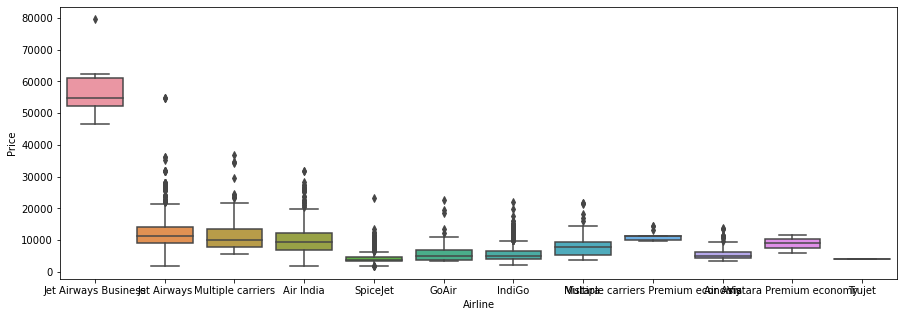

In [39]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Airline',y='Price',data=train_df.sort_values('Price',ascending=False))

#### Total stops vs Price Analysis

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

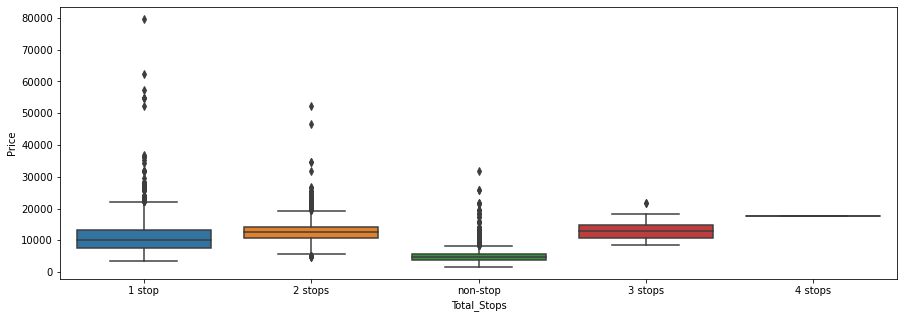

In [40]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Total_Stops',y='Price',data=train_df.sort_values('Price',ascending=False))

In [41]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline=pd.get_dummies(categorical['Airline'], drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [42]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

#### Source  vs Price Analysis

<AxesSubplot:xlabel='Source', ylabel='Price'>

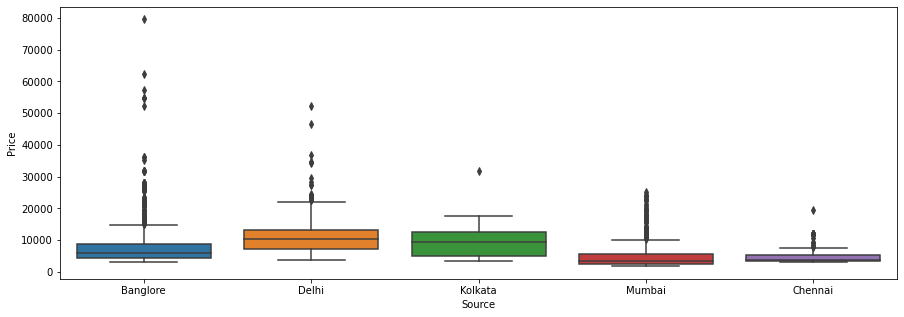

In [43]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Source',y='Price',data=train_df.sort_values('Price',ascending=False))

In [44]:
## Source is Nominal Categorical data we will perform OneHotEncoding
Source = train_df[["Source"]]
Source=pd.get_dummies(Source, drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [45]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

#### Destination vs Price

<AxesSubplot:xlabel='Destination', ylabel='Price'>

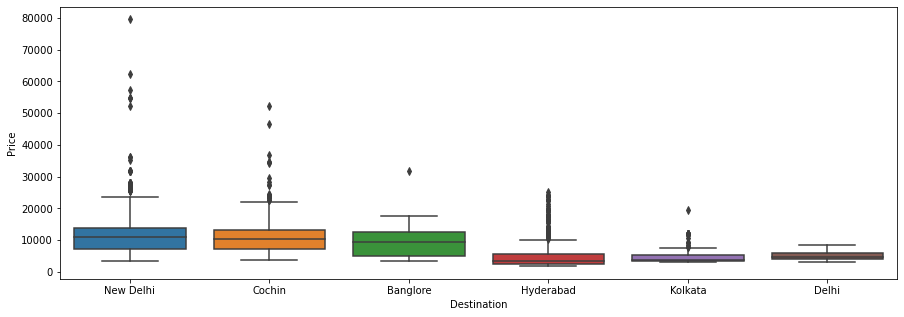

In [46]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Destination',y='Price',data=train_df.sort_values('Price',ascending=False))

In [47]:
## Destination is Nominal Categorical data we will perform OneHotEncoding
Destination = train_df[["Destination"]]
Destination=pd.get_dummies(Destination, drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


#### Using Label Encoder to Route column 

In [48]:
categorical['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [49]:
import warnings 
from warnings import filterwarnings
filterwarnings('ignore')

In [50]:
categorical['Route_1']=categorical['Route'].str.split('→').str[0]
categorical['Route_2']=categorical['Route'].str.split('→').str[1]
categorical['Route_3']=categorical['Route'].str.split('→').str[2]
categorical['Route_4']=categorical['Route'].str.split('→').str[3]
categorical['Route_5']=categorical['Route'].str.split('→').str[4]

In [51]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [52]:
drop_column(categorical,'Route')

In [53]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
dtype: int64

In [54]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [55]:
## As Route 3,4,5 has null values so we replace this with 'None'.
for i in ['Route_3','Route_4','Route_5']:
    categorical[i].fillna('None',inplace=True)

In [56]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [57]:
## now extract how many categories in each categorical features.
for i in categorical.columns:
    print('{} has total {} categories'.format(i,len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route_1 has total 5 categories
Route_2 has total 45 categories
Route_3 has total 30 categories
Route_4 has total 14 categories
Route_5 has total 6 categories


In [58]:
### as there is lots of features in Route , one hot encoding will not be a better option . So applying Label Encoding

In [59]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [60]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [61]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4','Route_5']:
    categorical[i]=encoder.fit_transform(categorical[i])

In [62]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [63]:
## But we Don't need Route as Route and Total_stops are alomost same so drop all routes columns
drop_column(categorical,'Route_1')

In [64]:
drop_column(categorical,'Route_2')

In [65]:
drop_column(categorical,'Route_3')

In [66]:
drop_column(categorical,'Route_4')

In [67]:
drop_column(categorical,'Route_5')

In [68]:
 ## Additional_Info contains almost 80% 'no_info',so we can drop this column
drop_column(categorical,'Additional_Info')

In [69]:
categorical.head()

,Airline,Source,Destination,Total_Stops
0,IndiGo,Banglore,New Delhi,non-stop
1,Air India,Kolkata,Banglore,2 stops
2,Jet Airways,Delhi,Cochin,2 stops
3,IndiGo,Kolkata,Banglore,1 stop
4,IndiGo,Banglore,New Delhi,1 stop


In [70]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [71]:
## Replacing 
dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [72]:
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

In [73]:
categorical.head()

,Airline,Source,Destination,Total_Stops
0,IndiGo,Banglore,New Delhi,0
1,Air India,Kolkata,Banglore,2
2,Jet Airways,Delhi,Cochin,2
3,IndiGo,Kolkata,Banglore,1
4,IndiGo,Banglore,New Delhi,1


In [74]:
# Concatenate dataframe --> categorical + Airline + Source + Destination

df_train=pd.concat([categorical,Airline,Source,Destination,train_df[cont_col]],axis=1)
df_train.head()

,Airline,Source,Destination,Total_Stops,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,...,Destination_New Delhi,Price,Day_of_Journey,Month_of_Journey,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,0,0,1,0,0,0,...,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,1,0,0,0,0,0,...,0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,0,0,0,1,0,0,...,0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,0,0,1,0,0,0,...,0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,0,1,0,0,0,...,1,13302,3,1,16,50,21,35,4,45


In [75]:
drop_column(df_train,'Airline')
drop_column(df_train,'Source')
drop_column(df_train,'Destination')

In [76]:
df_train.head()

,Total_Stops,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,...,Destination_New Delhi,Price,Day_of_Journey,Month_of_Journey,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,0,1,0,0,0,0,0,0,...,1,3897,24,3,22,20,1,10,2,50
1,2,1,0,0,0,0,0,0,0,0,...,0,7662,5,1,5,50,13,15,7,25
2,2,0,0,0,1,0,0,0,0,0,...,0,13882,6,9,9,25,4,25,19,0
3,1,0,0,1,0,0,0,0,0,0,...,0,6218,5,12,18,5,23,30,5,25
4,1,0,0,1,0,0,0,0,0,0,...,1,13302,3,1,16,50,21,35,4,45


In [77]:
## Setting Limit
pd.set_option('display.max_columns',35)

In [78]:
df_train.head()

,Total_Stops,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Price,Day_of_Journey,Month_of_Journey,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


### Outlier Detection

In [79]:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    

<Figure size 2160x1440 with 0 Axes>

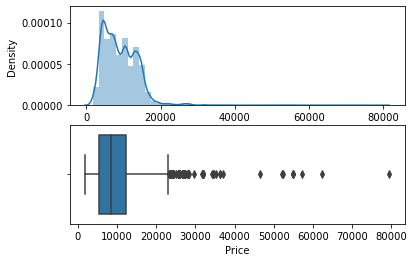

In [80]:
plt.figure(figsize=(30,20))
plot(df_train,'Price')

In [81]:
## Dealing with outlier
df_train['Price']=np.where(df_train['Price']>=40000,df_train['Price'].median(),df_train['Price'])

<Figure size 2160x1440 with 0 Axes>

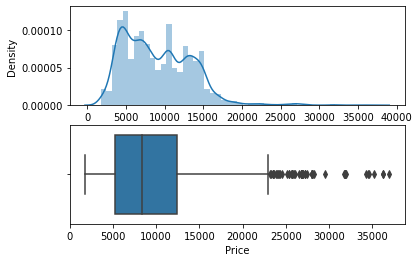

In [82]:
plt.figure(figsize=(30,20))
plot(df_train,'Price')

In [83]:
### separating your independent & dependent data
X=df_train.drop('Price',axis=1)
X.head()

,Total_Stops,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Day_of_Journey,Month_of_Journey,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,22,20,1,10,2,50
1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,5,50,13,15,7,25
2,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,9,25,4,25,19,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,18,5,23,30,5,25
4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,16,50,21,35,4,45


In [84]:
X.shape

(10682, 29)

In [85]:
y=df_train['Price']
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [86]:
type(X)

pandas.core.frame.DataFrame

In [87]:
type(y)

pandas.core.series.Series

In [88]:
X.isnull().sum()

Total_Stops                          0
Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Trujet                               0
Vistara                              0
Vistara Premium economy              0
Source_Chennai                       0
Source_Delhi                         0
Source_Kolkata                       0
Source_Mumbai                        0
Destination_Cochin                   0
Destination_Delhi                    0
Destination_Hyderabad                0
Destination_Kolkata                  0
Destination_New Delhi                0
Day_of_Journey                       0
Month_of_Journey                     0
Dep_Time_hour                        0
Dep_Time_minute                      0
Arrival_Time_hour        

In [89]:
y.isnull().sum()

0

### Feature Selection

In [90]:
####  Feature Selection using Information Gain

In [91]:
from sklearn.feature_selection import mutual_info_classif

In [92]:
mutual_info_classif(X,y)

array([2.11614146, 0.77182736, 0.10664492, 0.67567271, 0.91213564,
       0.01119917, 0.57468357, 0.0323098 , 0.32560686, 0.01688525,
       0.22671122, 0.        , 0.15921784, 1.50010617, 0.86395893,
       0.2805662 , 1.52621678, 0.42533822, 0.29519501, 0.15655038,
       0.37625865, 1.06054337, 0.86258174, 1.41083305, 1.22510927,
       1.83509168, 1.53173733, 1.78012018, 1.08290774])

In [93]:
imp_df=pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp_df

,0
Total_Stops,2.177870
Air India,0.729846
GoAir,0.088522
IndiGo,0.660140
Jet Airways,0.906196
Jet Airways Business,0.000000
Multiple carriers,0.564147
Multiple carriers Premium economy,0.019058
SpiceJet,0.312187
Trujet,0.007746


In [94]:
imp_df.columns=['importance']
imp_df.sort_values(by='importance',ascending=False)

,importance
Total_Stops,2.177870
Arrival_Time_hour,1.836428
Duration_hours,1.796937
Arrival_Time_minute,1.546463
Source_Delhi,1.528510
Destination_Cochin,1.527796
Dep_Time_hour,1.423600
Dep_Time_minute,1.206320
Duration_mins,1.077267
Day_of_Journey,1.074761


#### Spliting Data into Train and Test

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [97]:
from sklearn import metrics


In [98]:
import pickle
import bz2
def predict(ml_model,dump):
    model=ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')
    
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))
    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    sns.distplot(y_test-y_prediction)
     ##dump your model using pickle so that we will re-use
    if dump==1:
        file=open('C:/Users/shiv/Data Science Projects/Flight Price Prediction/model.pkl','wb')
        pickle.dump(model,file)
   

In [99]:
## Random forest
from sklearn.ensemble import RandomForestRegressor

Training score : 0.953394025858997
predictions are: 
 [10792.46       13935.99916667  2304.28       ... 13505.5075
  8880.53        4823.        ]


r2 score: 0.8069288243090211
MAE: 1214.5490846012772
MSE: 3907800.848841472
RMSE: 1976.8158358434587


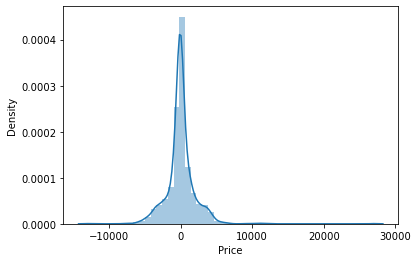

In [100]:
predict(RandomForestRegressor(),1)

In [101]:
## Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

Training score : 0.612095057640635
predictions are: 
 [11912.58462857 11407.91696953  3323.93446064 ... 11418.54971748
  7975.71224262  2994.99033914]


r2 score: 0.5777527282141024
MAE: 2028.5489664987574
MSE: 8546372.814070059
RMSE: 2923.4180019405467


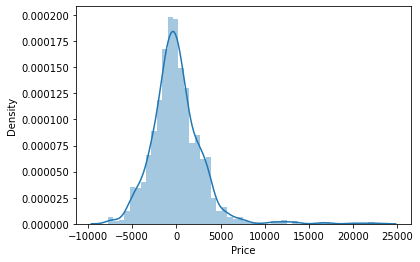

In [102]:
predict(LinearRegression(),0)

Training score : 0.7415331187559759
predictions are: 
 [10786.  12938.6  2648.6 ... 12618.2 15380.8  4127.4]


r2 score: 0.589129590327669
MAE: 1907.137388862892
MSE: 8316102.7529620975
RMSE: 2883.765377585718


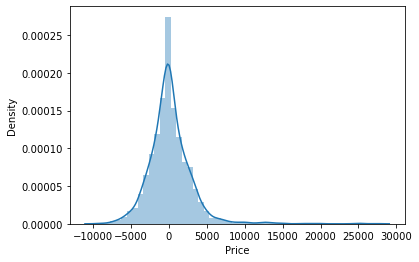

In [103]:
predict(KNeighborsRegressor(),0)

Training score : 0.967507688431559
predictions are: 
 [10676. 14781.  2227. ... 13941.  8513.  4823.]


r2 score: 0.7000557466933968
MAE: 1417.203119638122
MSE: 6070934.221443353
RMSE: 2463.926586049867


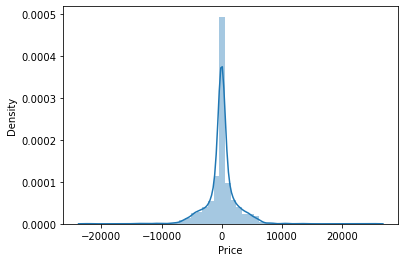

In [104]:
predict(DecisionTreeRegressor(),0)

#### Hyperparameter Tuning

In [105]:
from sklearn.model_selection import RandomizedSearchCV

In [106]:
# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=6)]

# Number of features to consider at every split
max_features=['auto','sqrt']

# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=4)]

# Minimum number of samples required to split a node
min_samples_split=[5,10,15,100]

In [107]:
# Create the random grid

random_grid={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split}

In [108]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [109]:
### initialise your estimator
reg_rf=RandomForestRegressor()

In [110]:
## Passing dictionary to Randomised search CV
# Random search of parameters, using 3 fold cross validation
rf_random=RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

In [111]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [112]:
## Checking Best parameters
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 13}

In [113]:
## PREDICTION
prediction=rf_random.predict(X_test)

<AxesSubplot:xlabel='Price', ylabel='Density'>

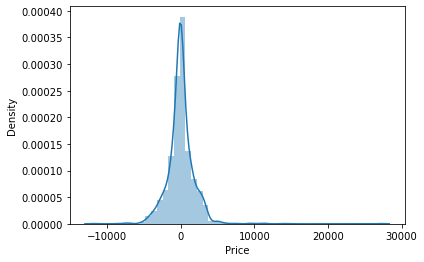

In [114]:
sns.distplot(y_test-prediction)

In [115]:
## ACCURACY
metrics.r2_score(y_test,prediction)

0.8323397253744244

In [ ]:
print('MAE',metrics.mean_absolute_error(y_test,prediction))
print('MSE',metrics.mean_squared_error(y_test,prediction))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

In [116]:
with bz2.BZ2File('rf_random.pkl', 'w') as f:
    pickle.dump(rf_random, f)

In [ ]:
# open a file, where you want to store the data
file=open('rf_random.pkl','wb')

In [ ]:
# dump information to that file
pickle.dump(rf_random,file)

In [ ]:
model=open('rf_random.pkl','rb')
forest=pickle.load(model)